# Notebook looks only at target 4 
We then compare how much information is gained in relative encodings/pooling/mfe/etc

In [55]:
import numpy as np
import pandas as pd
import edit_distance
from sklearn import linear_model, preprocessing
from sklearn.linear_model import HuberRegressor, Ridge
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib as mpl
#make sure to install keras if you don't have the package yet
from keras import layers, models

In [56]:
TRIAL_1_PATH = "../data/target4/0115_cr4_kd_fitting_filtered_free_Imax_yint_capped_FULL.csv_mfe_structures.csv"
TRIAL_2_PATH = "../data/target4/1219_cr4_kd_fitting_filtered_free_Imax_yint_capped_FULL.csv_mfe_structures.csv"

In [57]:
df1 = pd.read_csv(TRIAL_1_PATH)
df2 = pd.read_csv(TRIAL_2_PATH)

In [58]:
perfect_sequence = 'GGGAATGGATCCACATCTACGAATTCGTA' + 'CCATAGAGAGGTTATCCGCTCA' + 'CCGAGATCGGAAGAGCACACGT'
PERFECT_KD1 = df1[df1['sequence'] == perfect_sequence].iloc[0]['kd']
PERFECT_KD2 = df2[df2['sequence'] == perfect_sequence].iloc[0]['kd']

df1['ABA'] = -(df1.kd/PERFECT_KD1).apply(np.log)
df2['ABA'] = -(df2.kd/PERFECT_KD2).apply(np.log)

max_aba1, min_aba1 = -np.log(1/PERFECT_KD1), -np.log(128/PERFECT_KD1)
max_aba2, min_aba2 = -np.log(1/PERFECT_KD2), -np.log(128/PERFECT_KD2)

df1['ABA_normalized'] = (df1['ABA']-min_aba1)/(max_aba1-min_aba1)
df2['ABA_normalized'] = (df2['ABA']-min_aba2)/(max_aba2-min_aba2)
df1.head()
#df1['normalized_aba'] = 

,sequence,kd,kd_uncertainty,y_intercept,delta_y,count,mfe,structure,ABA,ABA_normalized
0,GGGAATGGATCCACATCTACGAATTCGTACCATAGAAGGTTATCCG...,41.803187,7.230034,31586.502668,60892.066606,55,-11.300000,.((.((((((.(........).)))))).))......((....))(...,-1.579180,0.230637
1,GGGAATGGATCCACATCTACGAATTCGTACCAGTAGAGAGGTTATG...,39.782497,4.399272,31058.327095,81584.997665,69,-16.500000,.((....((((....(((((............)))))..))))......,-1.529634,0.240848
2,GGGAATGGATCCACATCTACGAATTCGTACGCATAGAGAGGTTATC...,31.501090,5.025573,34797.864090,75097.116193,44,-14.400000,......((((((...((((((........))..))))..))..)))...,-1.296229,0.288953
3,GGGAATGGATCCACATCTACGAATTCGTACCATAGAGAGGTTTAGG...,8.757021,0.396640,36829.983437,157541.995021,55,-10.600000,.........(((..((((.((...(((((((.......)))....)...,-0.016063,0.552794
4,GGGAATGGATCCACATCTACGAATTCGTACCATAGAGAGGTTTATC...,19.476614,1.049690,32988.868890,82569.957220,65,-19.299999,((((.((((((....((((((....))).....)))..))))))))...,-0.815422,0.388047


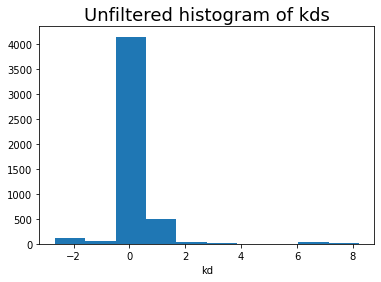

In [59]:
plt.title("Unfiltered histogram of kds", fontsize=18)
plt.xlabel('kd')
plt.hist(df1.ABA_normalized)
plt.show()

In [60]:
df1_filt = df1[(df1['kd'] >= 1) & (df1['kd'] <= 128)]
df2_filt = df2[(df2['kd'] >= 1) & (df2['kd'] <= 128)]

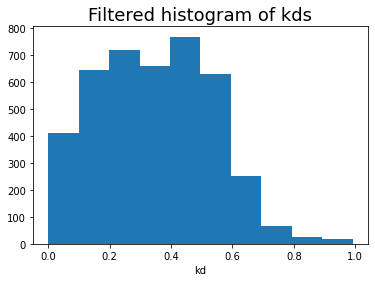

In [81]:
plt.title("Filtered histogram of kds", fontsize=18)
plt.xlabel('kd')
plt.hist(df1_filt.ABA_normalized)
plt.show()

In [82]:
merged = pd.merge(df1, df2, on= 'sequence', suffixes = ('_1', '_2'))

In [83]:
merged.head()

,sequence,kd_1,kd_uncertainty_1,y_intercept_1,delta_y_1,count_1,mfe_1,structure_1,ABA_1,ABA_normalized_1,kd_2,kd_uncertainty_2,y_intercept_2,delta_y_2,count_2,mfe_2,structure_2,ABA_2,ABA_normalized_2
0,GGGAATGGATCCACATCTACGAATTCGTACCATAGAAGGTTATCCG...,41.803187,7.230034,31586.502668,60892.066606,55,-11.300000,.((.((((((.(........).)))))).))......((....))(...,-1.579180,0.230637,19.554217,1.946373,31129.18877,52937.106640,53,-11.300000,.((.((((((.(........).)))))).))......((....))(...,-1.568093,0.387227
1,GGGAATGGATCCACATCTACGAATTCGTACCAGTAGAGAGGTTATG...,39.782497,4.399272,31058.327095,81584.997665,69,-16.500000,.((....((((....(((((............)))))..))))......,-1.529634,0.240848,15.235706,1.162817,32524.49598,59863.699156,66,-16.500000,.((....((((....(((((............)))))..))))......,-1.318544,0.438659
2,GGGAATGGATCCACATCTACGAATTCGTACGCATAGAGAGGTTATC...,31.501090,5.025573,34797.864090,75097.116193,44,-14.400000,......((((((...((((((........))..))))..))..)))...,-1.296229,0.288953,12.054378,1.786545,30000.00000,55128.822589,39,-14.400000,......((((((...((((((........))..))))..))..)))...,-1.084330,0.486931
3,GGGAATGGATCCACATCTACGAATTCGTACCATAGAGAGGTTTAGG...,8.757021,0.396640,36829.983437,157541.995021,55,-10.600000,.........(((..((((.((...(((((((.......)))....)...,-0.016063,0.552794,2.843775,0.204964,30000.00000,94047.667491,55,-10.600000,.........(((..((((.((...(((((((.......)))....)...,0.359966,0.784599
4,GGGAATGGATCCACATCTACGAATTCGTACCATAGAGAGGTTTATC...,19.476614,1.049690,32988.868890,82569.957220,65,-19.299999,((((.((((((....((((((....))).....)))..))))))))...,-0.815422,0.388047,6.003755,0.656704,30000.00000,62331.620848,64,-19.299999,((((.((((((....((((((....))).....)))..))))))))...,-0.387287,0.630591


In [84]:
merged_filt = merged[(merged['kd_1'] >= 1) & (merged['kd_1'] <= 128) & (merged['kd_2'] >= 1) & (merged['kd_2'] <= 128)]

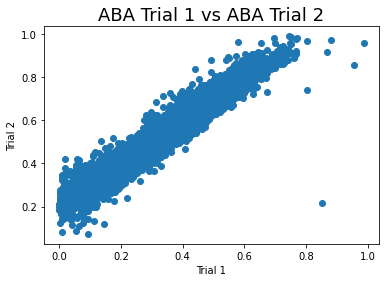

In [85]:
plt.scatter(list(merged_filt['ABA_normalized_1']), list(merged_filt['ABA_normalized_2']))
plt.title('ABA Trial 1 vs ABA Trial 2', fontsize = 18)
plt.xlabel('Trial 1')
plt.ylabel('Trial 2')
plt.show()

In [86]:
print("correlation between two normalized ABA trials is {}".format(np.corrcoef(merged_filt['ABA_normalized_1'],merged_filt['ABA_normalized_2'])))

correlation between two normalized ABA trials is [[1.         0.96358682]
 [0.96358682 1.        ]]


In [87]:
print("correlation between two kds is {}".format(np.corrcoef(merged_filt['kd_1'],merged_filt['kd_2'])[0][1]))
print("correlation between two normalized ABA trials is {}".format(np.corrcoef(merged_filt['ABA_normalized_1'],
                                                                               merged_filt['ABA_normalized_2'])[0][1]))

correlation between two kds is 0.9144122636381181
correlation between two normalized ABA trials is 0.9635868244025724


In [66]:
merged_filt['kd_1']

0       41.803187
1       39.782497
2       31.501090
3        8.757021
4       19.476614
          ...    
4924    17.580352
4925    13.397676
4926    16.401250
4927    68.086314
4928    11.845369
Name: kd_1, Length: 4128, dtype: float64

In [52]:
merged_filt.shape

(4196, 19)